<a href="https://colab.research.google.com/github/sandovalmedeiros/PythonGeo/blob/main/Script_Random_Forest_Semana_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [74]:
# Instalando a biblioteca para uso
# !pip install scikit-optimize

In [75]:
#%% ------------------------------------- Importando data set

df = pd.read_csv('/content/dataset_problema2.csv')

X = df.drop(['id','Severidade'],axis=1)
y = df['Severidade']

In [76]:
# %% ------------------- separando dados de treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#%%
import seaborn as sns
correlacao = df.corr()
print(correlacao)


                  id  NDVI_d28  SAVI_d28  GNDVI_d28  MCARI1_d28    SR_d28  \
id          1.000000 -0.237474 -0.237466  -0.255535   -0.131867 -0.250596   
NDVI_d28   -0.237474  1.000000  1.000000   0.956588    0.894749  0.985494   
SAVI_d28   -0.237466  1.000000  1.000000   0.956589    0.894766  0.985495   
GNDVI_d28  -0.255535  0.956588  0.956589   1.000000    0.837498  0.943480   
MCARI1_d28 -0.131867  0.894749  0.894766   0.837498    1.000000  0.898975   
SR_d28     -0.250596  0.985494  0.985495   0.943480    0.898975  1.000000   
NDVI_d01   -0.228540  0.911626  0.911630   0.879544    0.862028  0.904785   
SAVI_d01   -0.228528  0.911619  0.911622   0.879535    0.862027  0.904779   
GNDVI_d01  -0.270028  0.929281  0.929282   0.970674    0.822237  0.916277   
MCARI1_d01 -0.022022  0.618063  0.618070   0.558315    0.662525  0.629810   
SR_d01     -0.219380  0.891605  0.891609   0.852399    0.859725  0.904479   
NDVI_d04   -0.055271  0.596099  0.596115   0.542860    0.749048  0.579936   

In [77]:
#%% ------------------------padronização dos dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   #media zero e desvio padrão 1

X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.columns = X_train.columns

X_test_sc = scaler.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X_test.columns

-0.06445199150879911
0.09396486029263365
0.6727804225015419
0.726672062129073
0.8223195978187627
0.8233753596097613
0.8202943759261935
0.8160171069363862
0.8338151334714663
0.8422790237784706
0.8410466834693298
0.8683231290715991
0.8665414455938999
0.8647909029046318
0.8634378066759402
0.8624696422147047
0.8525517850996375
0.8509965500619827
0.8456282534244405
     NDVI_d28  SAVI_d28  GNDVI_d28  MCARI1_d28    SR_d28  NDVI_d01  SAVI_d01  \
0   -0.380544 -0.380577  -0.311805   -0.677999 -0.506855 -0.203134 -0.203084   
1    0.266774  0.266748   0.642087   -0.160619  0.197189  0.616062  0.616078   
2   -0.137397 -0.137410  -0.009792   -0.409558 -0.448334 -0.015128 -0.015114   
3   -0.461724 -0.461751  -0.333185   -0.783158 -0.617507 -0.721137 -0.721193   
4   -2.007785 -2.007719  -2.079729   -1.167981 -1.902287 -1.530393 -1.530369   
..        ...       ...        ...         ...       ...       ...       ...   
100  0.323880  0.323897  -0.030979    0.567064  0.087965 -0.042120 -0.042139 

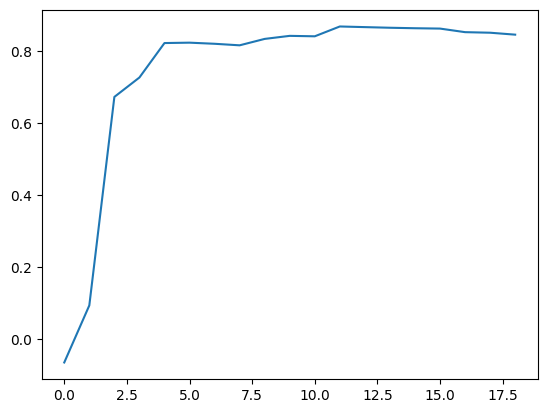

In [78]:
#%% -----seleção de features - só usado para gerar o plot e ver até quando vale a pena
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lista_score = list()

for i in range(1,20):
     modelo_linear = LinearRegression()

     selector = RFE(modelo_linear, n_features_to_select=i, step=1)
     selector = selector.fit(X_train,y_train)

     mask = selector.support_

     features = X_train_sc.columns

     sel_features = features[mask]

     X_sel = X_train_sc[sel_features]
     score = cross_val_score(modelo_linear,X_sel,y_train, cv=10, scoring='r2')
     print(np.mean(score))

     lista_score.append(np.mean(score))

print(X_sel)
plt.plot(lista_score)
plt.show()

0.8456282534244405


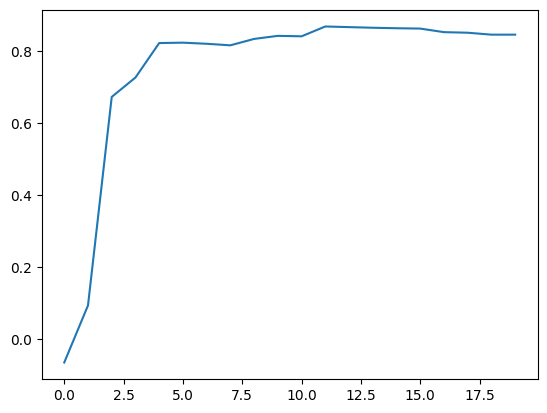

Index(['NDVI_d28', 'SAVI_d28', 'GNDVI_d28', 'MCARI1_d28', 'SR_d28', 'NDVI_d01',
       'SAVI_d01', 'GNDVI_d01', 'SR_d01', 'NDVI_d04', 'SAVI_d04', 'GNDVI_d04',
       'MCARI1_d04', 'SR_d04', 'NDVI_d08', 'SAVI_d08', 'GNDVI_d08',
       'MCARI1_d08', 'SR_d08'],
      dtype='object')


In [79]:
#--- Seleção final das features
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Criando o objeto
modelo_linear = LinearRegression()

selecao = RFE(modelo_linear, n_features_to_select=15, step=1)
selecao = selector.fit(X_train,y_train)

mask = selector.support_

features = X_train_sc.columns

sel_features = features[mask]

X_sel = X_train_sc[sel_features]
score = cross_val_score(modelo_linear,X_sel,y_train, cv=10, scoring='r2')
print(np.mean(score))

lista_score.append(np.mean(score))

plt.plot(lista_score)
plt.show()
print(sel_features)

In [80]:
#%% ----------------------- random florest

# A Biblioteca NumPy está retornando erro de passagem de parametros que eu não consegui descobrir do que se trata.
# A solução foi executar o parâmtro ótimo achado em outra máquina

#from sklearn.ensemble import RandomForestRegressor
#from skopt import gp_minimize

#def treinar_modelo(parametros):
#    model_rf = RandomForestRegressor(
#        n_estimators=parametros[0],
#        criterion=parametros[1],
#        max_depth=parametros[2],
#        min_samples_split=parametros[3],
#        min_samples_leaf=parametros[4],
#        random_state=0,
#        n_jobs=-1
#   )
#    score = cross_val_score(model_rf, X_sel, y_train, cv=10)
#    mean_score = np.mean(score.astype(np.float64)) #mean_score = np.mean(score)
#    return mean_score*(-1)

#parametros = [
#    ('squared_error', 'absolute_error', 'friedman_mse', 'poisson'),
#    (100, 1000),
#    (3, 20),
#    (2, 10),
#    (1, 10)
#]

#parametros = [(100,1000),('squared_error','absolute_error','friedman_mse','poisson'),(3,20),(2,10),(1,10)]

#otimos_rf = gp_minimize(treinar_modelo, parametros, random_state=0, verbose=1, n_calls=11, n_random_starts=10)
#print('otm RandonForest', otimos_rf.fun, otimos_rf.x)


In [81]:
#%% ------------------ usando RF

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model_rf = RandomForestRegressor(
        criterion='absolute_error',
        n_estimators=951,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=2,
        random_state=0,
        n_jobs=-1
    )

model_rf.fit(X_sel, y_train)
y_pred = model_rf.predict(X_test_sc[sel_features])


rmse = (mean_squared_error(y_test, y_pred)**0.5)
print('RMSE =',rmse)

mae = mean_absolute_error(y_test, y_pred) #min absolut error
print('MAE =',mae)

r2 = model_rf.score(X_test_sc[sel_features], y_test)
print('R2 =',r2)

X = df.drop(['id','Severidade'],axis=1)
y = df['Severidade']

RMSE = 7.509532149662831
MAE = 6.681265140008585
R2 = 0.8885250530017597
